In [1]:
import numpy as np
import pandas as pd

%matplotlib inline

# generate a daily signal covering one year 2016 in a pandas dataframe
N = 360
df_train = pd.DataFrame({"Date" : pd.date_range(start="2016-01-25", periods=N, freq='D'),
                         "Signal" : (np.arange(N)//40 + np.arange(N) % 21 + np.random.randn(N))})


In [2]:
df_train.head(12)

,Date,Signal
0,2016-01-25,-0.215717
1,2016-01-26,2.303499
2,2016-01-27,1.583171
3,2016-01-28,2.408425
4,2016-01-29,4.395581
5,2016-01-30,7.033480
6,2016-01-31,7.432512
7,2016-02-01,6.539640
8,2016-02-02,7.693670
9,2016-02-03,8.580467


In [3]:
df_train.tail(12)

,Date,Signal
348,2017-01-07,19.610150
349,2017-01-08,20.869215
350,2017-01-09,20.889400
351,2017-01-10,21.715997
352,2017-01-11,23.988040
353,2017-01-12,25.852028
354,2017-01-13,26.385652
355,2017-01-14,26.420038
356,2017-01-15,29.726999
357,2017-01-16,8.793226


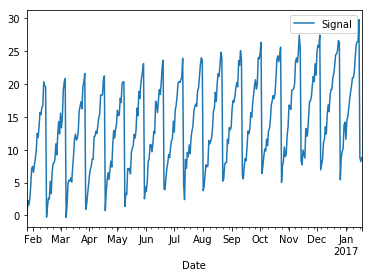

In [4]:
df_train.plot('Date' , ['Signal'])

In [5]:

import pyaf.ForecastEngine as autof
# create a forecast engine. This is the main object handling all the operations
lEngine = autof.cForecastEngine()

# get the best time series model for predicting one week
lEngine.train(iInputDS = df_train, iTime = 'Date', iSignal = 'Signal', iHorizon = 7);
lEngine.getModelInfo() # => relative error 7% (MAPE)


INFO:pyaf.std:START_TRAINING 'Signal'
INFO:pyaf.std:END_TRAINING_TIME_IN_SECONDS 'Signal' 2.986666202545166
INFO:pyaf.std:TIME_DETAIL TimeVariable='Date' TimeMin=2016-01-25T00:00:00.000000 TimeMax=2016-11-01T00:00:00.000000 TimeDelta=1 days Estimation = (0 , 282) Validation = (282 , 353) Test = (353 , 360) Horizon=7
INFO:pyaf.std:SIGNAL_DETAIL SignalVariable='_Signal' Min=-0.277413958792 Max=29.7269993848  Mean=13.9069331042 StdDev=6.64648530622
INFO:pyaf.std:BEST_TRANSOFORMATION_TYPE '_'
INFO:pyaf.std:BEST_DECOMPOSITION  '_Signal_ConstantTrend_residue_Seasonal_DayOfWeek_residue_AR(64)' [ConstantTrend + Seasonal_DayOfWeek + AR(64)]
INFO:pyaf.std:TREND_DETAIL '_Signal_ConstantTrend' [ConstantTrend]
INFO:pyaf.std:CYCLE_DETAIL '_Signal_ConstantTrend_residue_Seasonal_DayOfWeek' [Seasonal_DayOfWeek]
INFO:pyaf.std:AUTOREG_DETAIL '_Signal_ConstantTrend_residue_Seasonal_DayOfWeek_residue_AR(64)' [AR(64)]
INFO:pyaf.std:MODEL_MAPE MAPE_Fit=0.293 MAPE_Forecast=0.0933 MAPE_Test=0.1011
INFO:pyaf.st

INFO:pyaf.std:START_PLOTTING
/home/antoine/.local/lib/python3.5/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
INFO:pyaf.std:END_PLOTTING_TIME_IN_SECONDS 2.3036434650421143


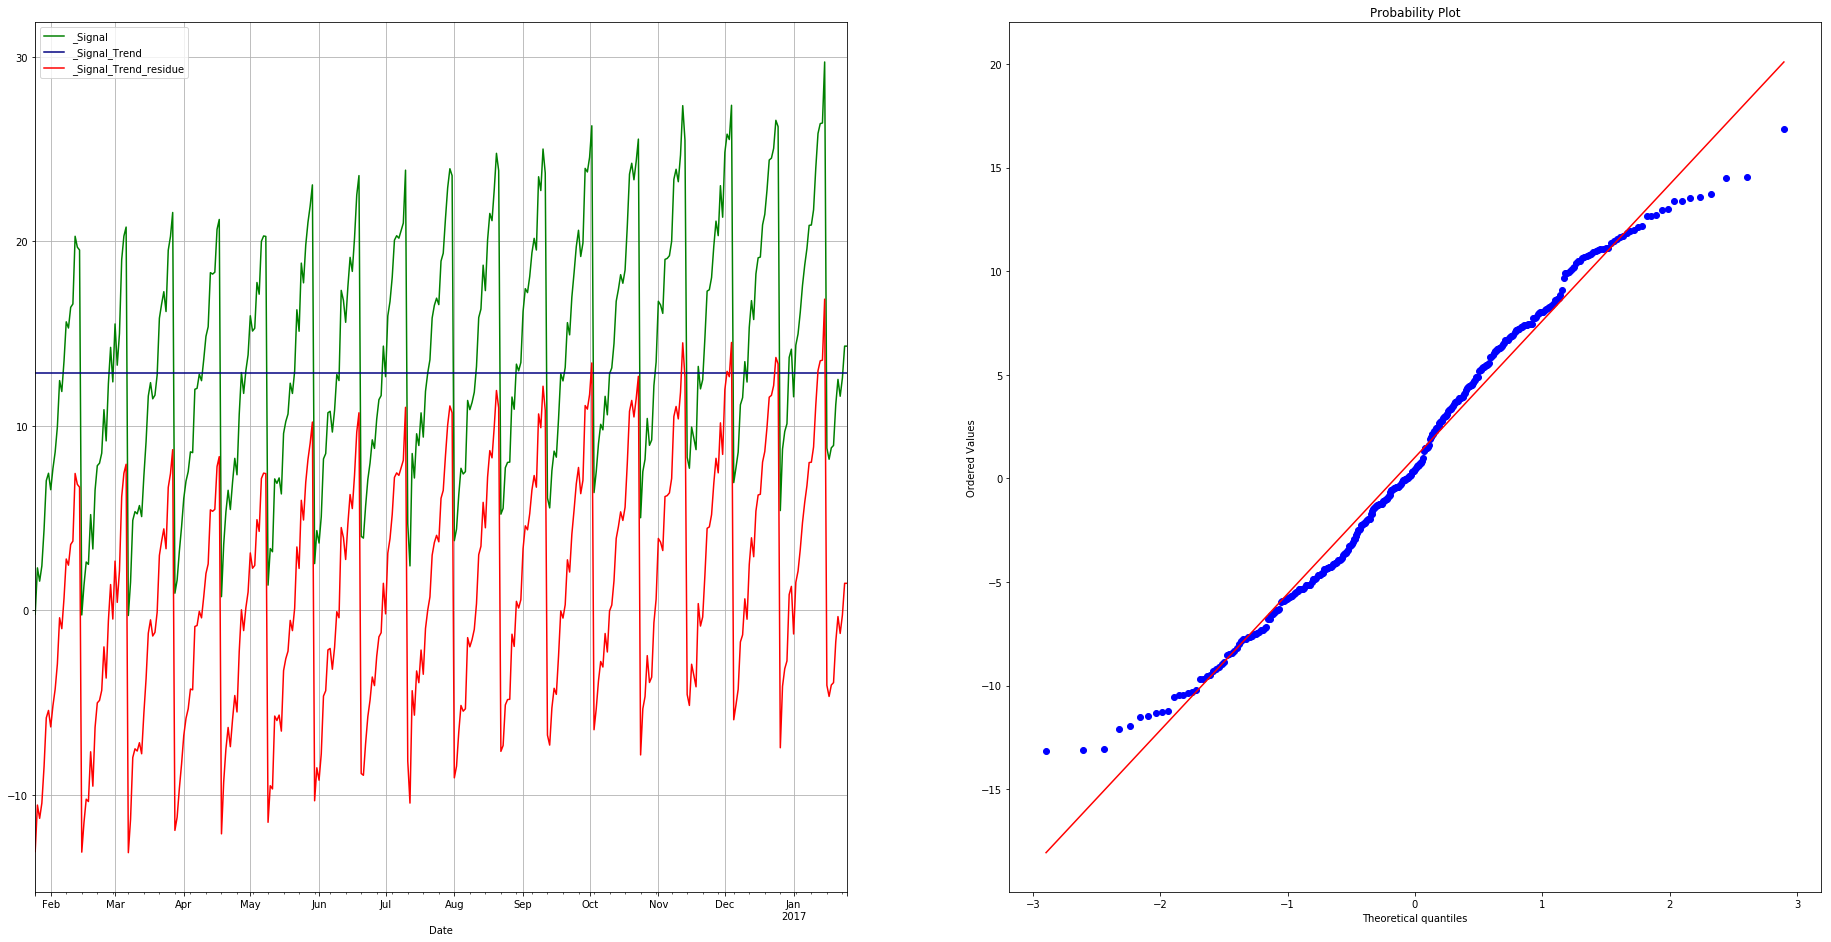

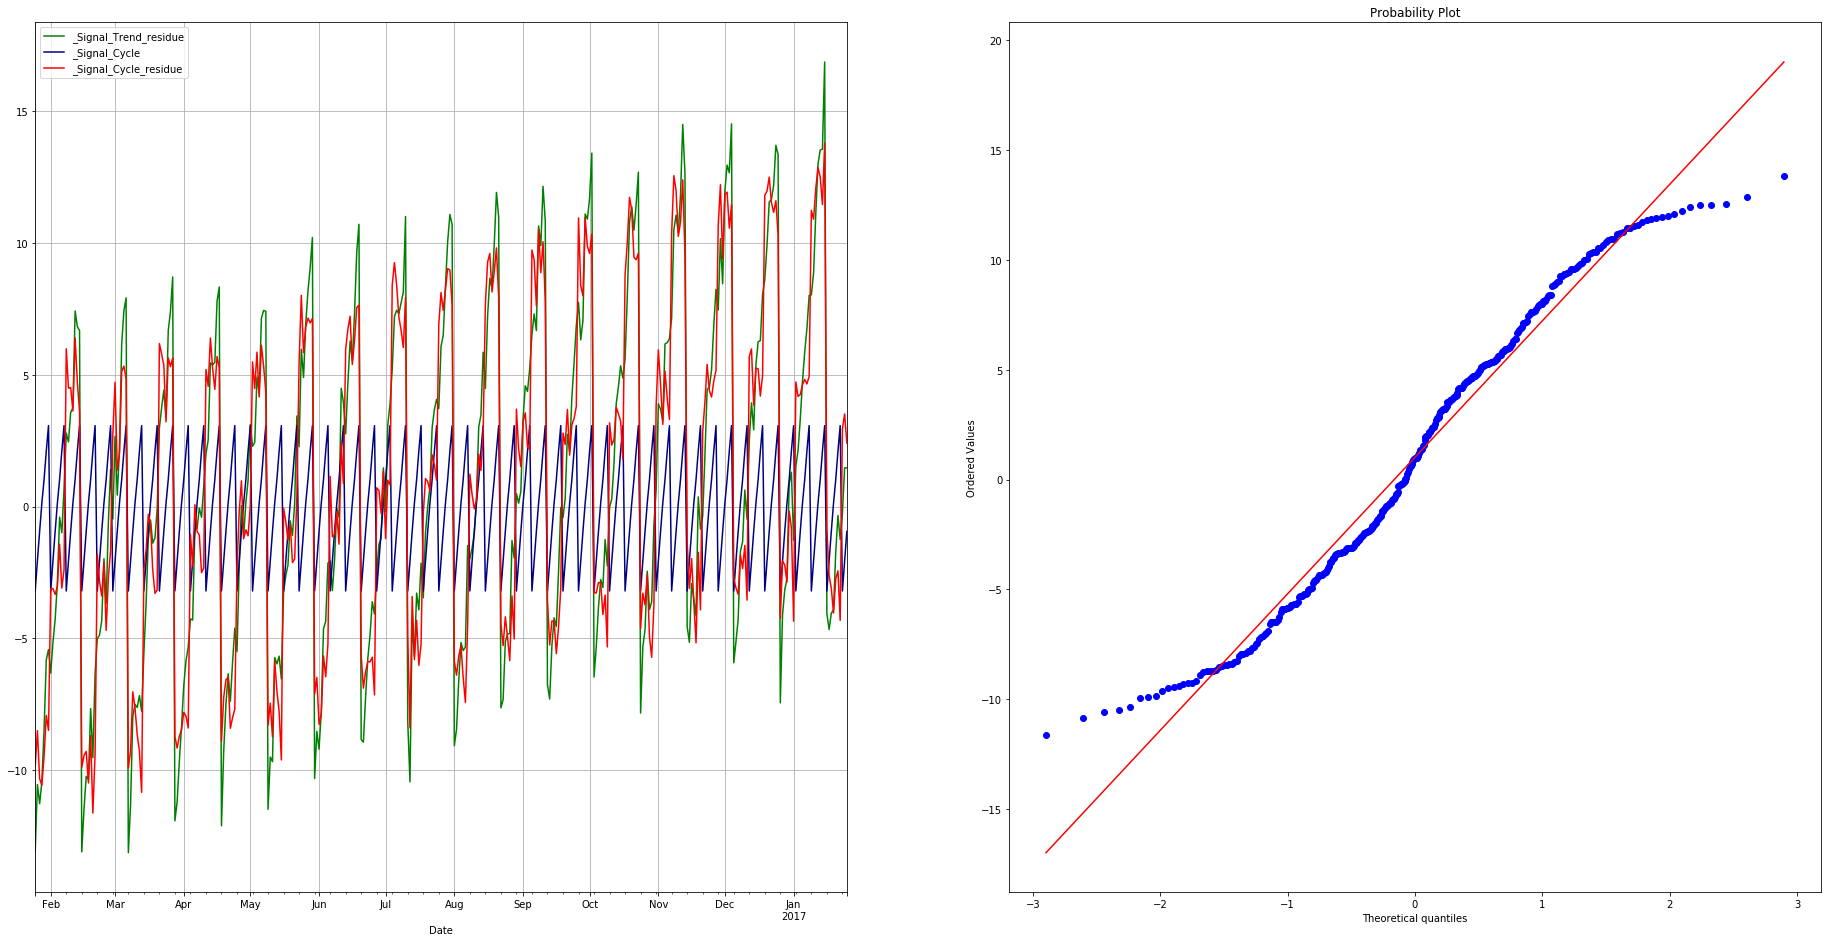

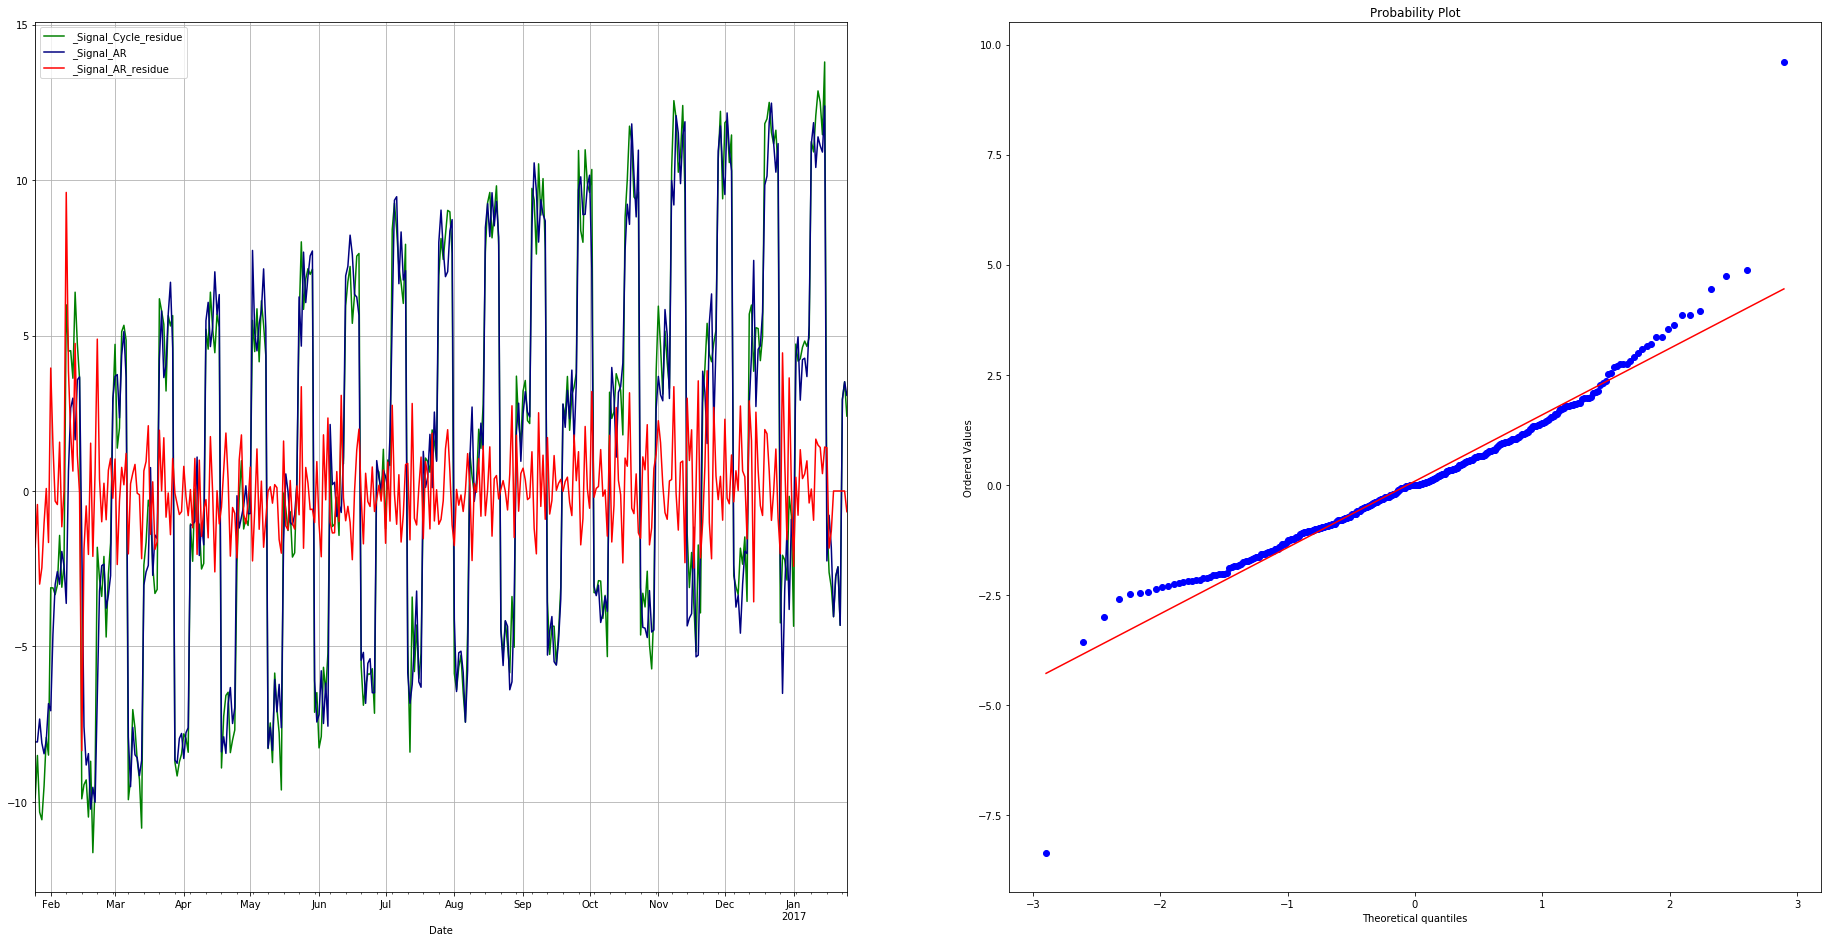

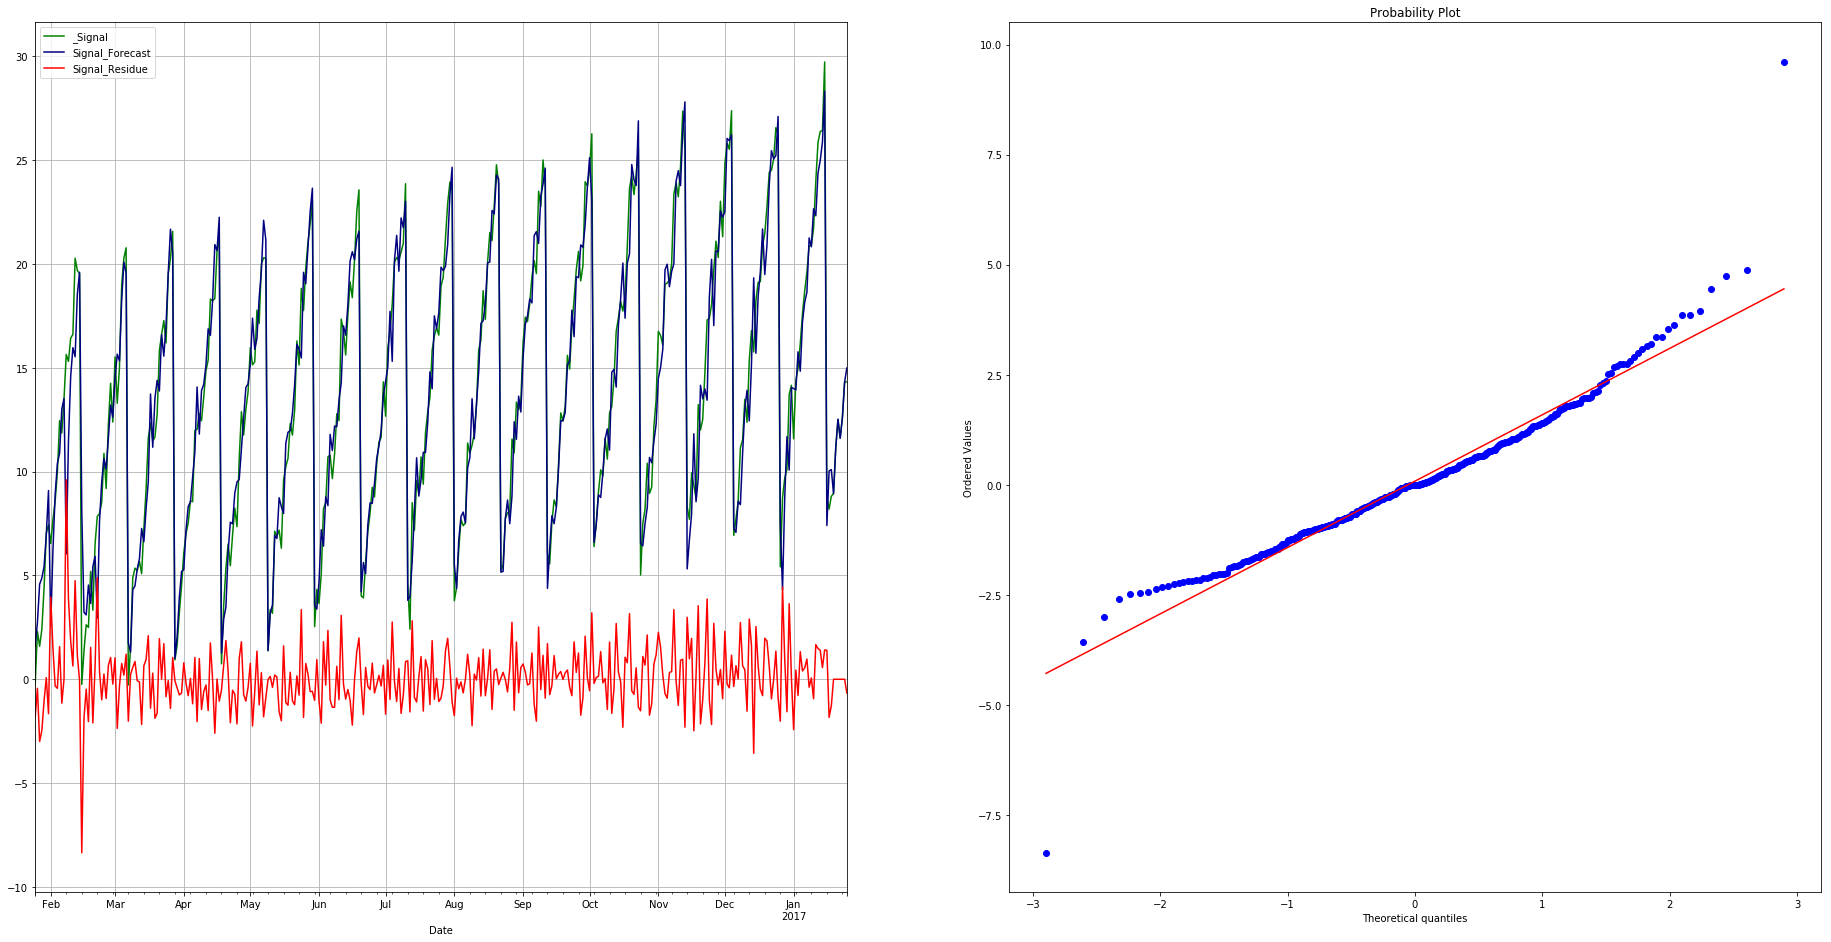

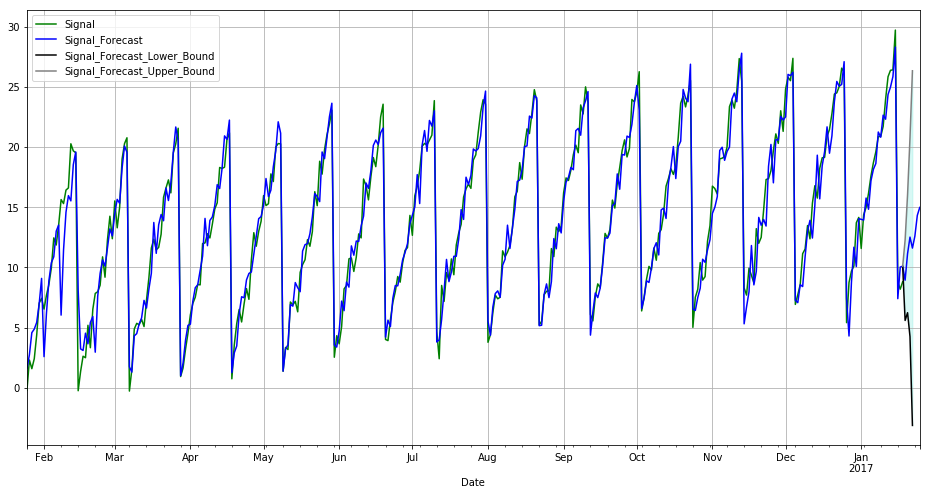

In [6]:
lEngine.standrdPlots()

In [7]:

# predict one week
df_forecast = lEngine.forecast(iInputDS = df_train, iHorizon = 7)
# list the columns of the forecast dataset
print(df_forecast.columns) #

# print the real forecasts
# Future dates : ['2017-01-19T00:00:00.000000000' '2017-01-20T00:00:00.000000000' '2017-01-21T00:00:00.000000000' '2017-01-22T00:00:00.000000000' '2017-01-23T00:00:00.000000000' '2017-01-24T00:00:00.000000000' '2017-01-25T00:00:00.000000000']
print(df_forecast['Date'].tail(7).values)

# signal forecast : [ 9.74934646  10.04419761  12.15136455  12.20369717  14.09607727 15.68086323  16.22296559]
print(df_forecast['Signal_Forecast'].tail(7).values)

INFO:pyaf.std:START_FORECASTING
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS 0.3515627384185791


Index(['Date', 'Signal', '_Signal', 'row_number', 'Date_Normalized',
       '_Signal_ConstantTrend', '_Signal_ConstantTrend_residue',
       '_Signal_ConstantTrend_residue_Seasonal_DayOfWeek',
       '_Signal_ConstantTrend_residue_Seasonal_DayOfWeek_residue',
       '_Signal_ConstantTrend_residue_Seasonal_DayOfWeek_residue_AR(64)',
       '_Signal_ConstantTrend_residue_Seasonal_DayOfWeek_residue_AR(64)_residue',
       '_Signal_Trend', '_Signal_Trend_residue', '_Signal_Cycle',
       '_Signal_Cycle_residue', '_Signal_AR', '_Signal_AR_residue',
       '_Signal_TransformedForecast', 'Signal_Forecast',
       '_Signal_TransformedResidue', 'Signal_Residue',
       'Signal_Forecast_Lower_Bound', 'Signal_Forecast_Upper_Bound'],
      dtype='object')
['2017-01-19T00:00:00.000000000' '2017-01-20T00:00:00.000000000'
 '2017-01-21T00:00:00.000000000' '2017-01-22T00:00:00.000000000'
 '2017-01-23T00:00:00.000000000' '2017-01-24T00:00:00.000000000'
 '2017-01-25T00:00:00.000000000']
[  8.93971012  11